<a href="https://colab.research.google.com/github/himanshu-raj420/Analyzer/blob/main/Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/Tele-Customer-Churn_dataset.csv')

print(df.info())
print(df.isnull().sum())
#Handle Missing Data, Data Types:


# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce').fillna(0)

# Drop unnecessary columns
df = df.drop(['customerID'], axis=1)

# Encode categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].apply(lambda x: pd.factorize(x)[0])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7011 entries, 0 to 7010
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7011 non-null   object 
 1   gender            7011 non-null   int64  
 2   SeniorCitizen     7011 non-null   int64  
 3   Partner           7011 non-null   int64  
 4   Dependents        7011 non-null   int64  
 5   Tenure            7011 non-null   int64  
 6   PhoneService      7011 non-null   int64  
 7   MultipleLines     7011 non-null   int64  
 8   InternetService   7011 non-null   int64  
 9   OnlineSecurity    7011 non-null   int64  
 10  OnlineBackup      7011 non-null   int64  
 11  DeviceProtection  7011 non-null   int64  
 12  TechSupport       7011 non-null   int64  
 13  StreamingTV       7011 non-null   int64  
 14  StreamingMovies   7011 non-null   int64  
 15  Contract          7011 non-null   int64  
 16  PaperlessBilling  7011 non-null   int64  


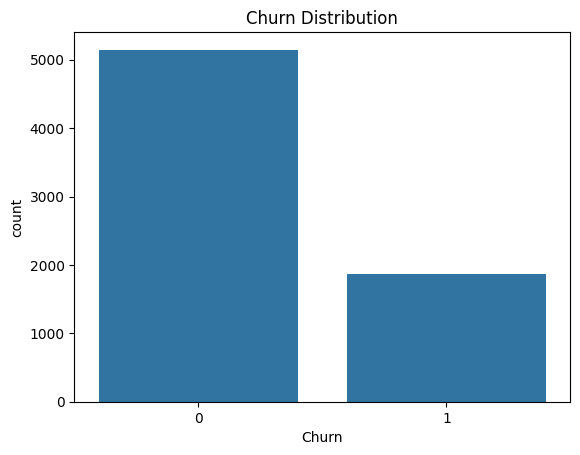

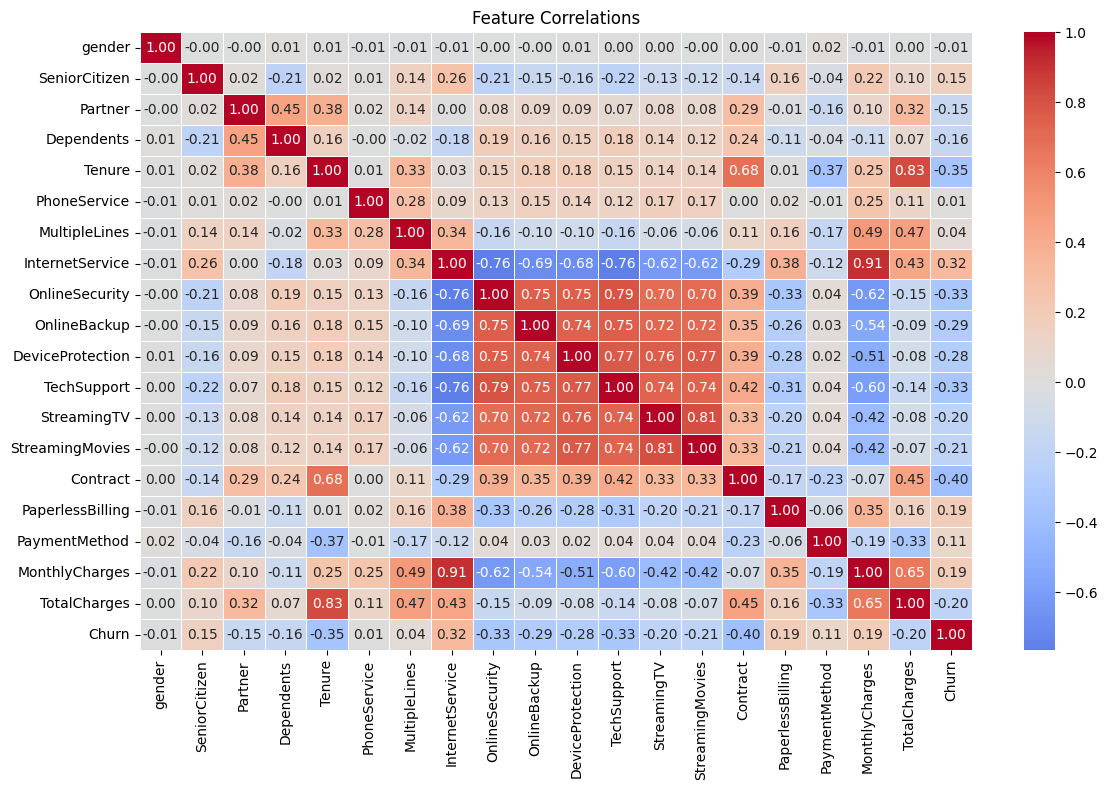

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Churn distribution
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

# Feature correlation heatmap
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Feature Correlations')
plt.tight_layout()
plt.show()


In [6]:
#Feature Selection and Train-Test Split
from sklearn.model_selection import train_test_split

X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
#Model Building
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [8]:
#Evaluation
from sklearn.metrics import classification_report, roc_auc_score

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))


              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1050
           1       0.63      0.49      0.55       353

    accuracy                           0.80      1403
   macro avg       0.73      0.70      0.71      1403
weighted avg       0.79      0.80      0.79      1403

ROC AUC: 0.8147335761500067


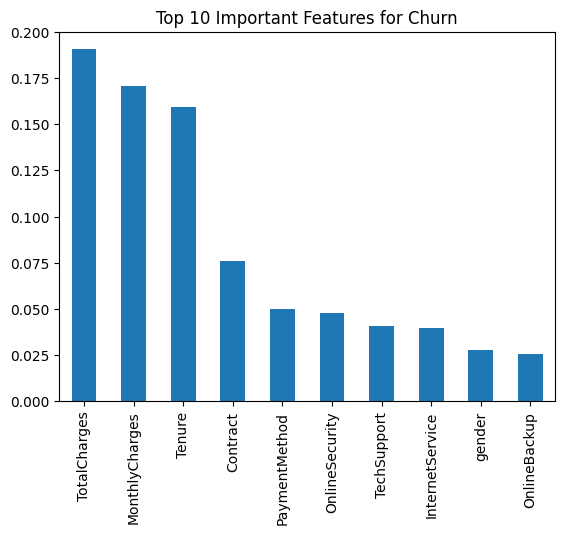

In [9]:
#Feature Importance Insights
feat_imp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
feat_imp.head(10).plot(kind='bar')
plt.title('Top 10 Important Features for Churn')
plt.show()
